Train the RF using the preapred data.

In [ ]:
load('../../../data/trainingData.RData')

In [2]:
length(labelTrain.subset)
table(labelTrain.subset)
dim(variantTrain.corr)

[1] 213658

labelTrain.subset
 FALSE   TRUE 
 15317 198341 

[1] 213658     17

In [3]:
source('../../../src/predictors.R')
source('../../../src/evaluate.R')

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [4]:
labelTrain.subset.str <- rep("non-driver", length(labelTrain.subset))
labelTrain.subset.str[labelTrain.subset] <- "Driver"
table(labelTrain.subset.str)

labelTrain.subset.str
    Driver non-driver 
    198341      15317 

In [5]:
colnames( variantTrain.corr)

[1] "Consequence"            "cgType"                 "t_vaf"                 
 [4] "t_alt_count"            "n_depth"                "n_vaf"                 
 [7] "n_alt_count"            "t_ref_plus_count"       "t_ref_neg_count"       
[10] "occurence_in_normals"   "SIFT_score"             "Kaviar_AF"             
[13] "isOncogene"             "Total.onco"             "cosmicCount"           
[16] "occurence_in_normals.1" "t_ref_plus_ratio"

In [ ]:
rfCV <- runCV(predictorRF, labelTrain.subset.str, variantTrain.corr,  nfolds=5, nrepeats=5, positiveClass="Driver") 
save(rfCV, file='../../../data/rfCV.RData')

[1] "start CV"
[1] "none"
.

Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”

[1] 0.85

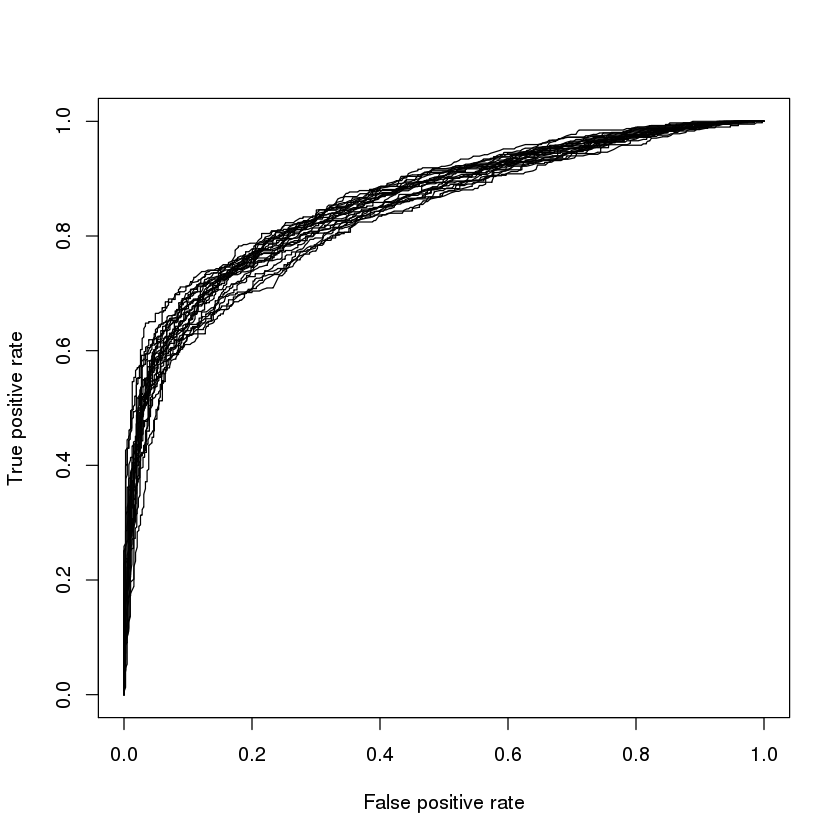

In [33]:
plot(evaluateCVwithROCR(rfCV, measure="tpr", x.measure="fpr"))
auc <- evaluateCVwithROCR(rfCV, measure="auc")
round(mean(as.numeric(auc@y.values)),2)

[1] 0.85

In [36]:
myrf <- randomForest(variantTrain.corr, factor(labelTrain.subset.str), ntree = 500)

In [37]:
summary(myrf)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       4000   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           8000   matrix numeric  
oob.times       4000   -none- numeric  
classes            2   -none- character
importance        13   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               4000   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     

In [71]:
names(myrf)

[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"

In [56]:
summary(myrf$forest)

           Length  Class  Mode   
ndbigtree      500 -none- numeric
nodestatus  660500 -none- numeric
bestvar     660500 -none- numeric
treemap    1321000 -none- numeric
nodepred    660500 -none- numeric
xbestsplit  660500 -none- numeric
pid              2 -none- numeric
cutoff           2 -none- numeric
ncat            11 -none- numeric
maxcat           1 -none- numeric
nrnodes          1 -none- numeric
ntree            1 -none- numeric
nclass           1 -none- numeric
xlevels         11 -none- list   

In [27]:
(VI_F=importance(myrf))

,MeanDecreaseGini
Consequence,81.44981
cgType,30.60672
t_vaf,216.33239
t_alt_count,324.21853
n_depth,222.32503
t_ref_plus_count,212.56972
t_ref_neg_count,221.01109
SIFT_score,103.47092
Kaviar_AF,326.59550
cosmicCount,74.91997
